In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import StackingClassifier, VotingClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers, losses, Sequential, layers
import pickle

In [2]:
data = pd.read_csv("C:\Lachin\DataSets\Breast Cancer\Breast_cancer_data.csv")

In [3]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
data.shape

(569, 6)

In [5]:
data.size

3414

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


## Data Analysis

In [7]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

Text(0.5, 1.0, 'Histogram of mean_smoothness')

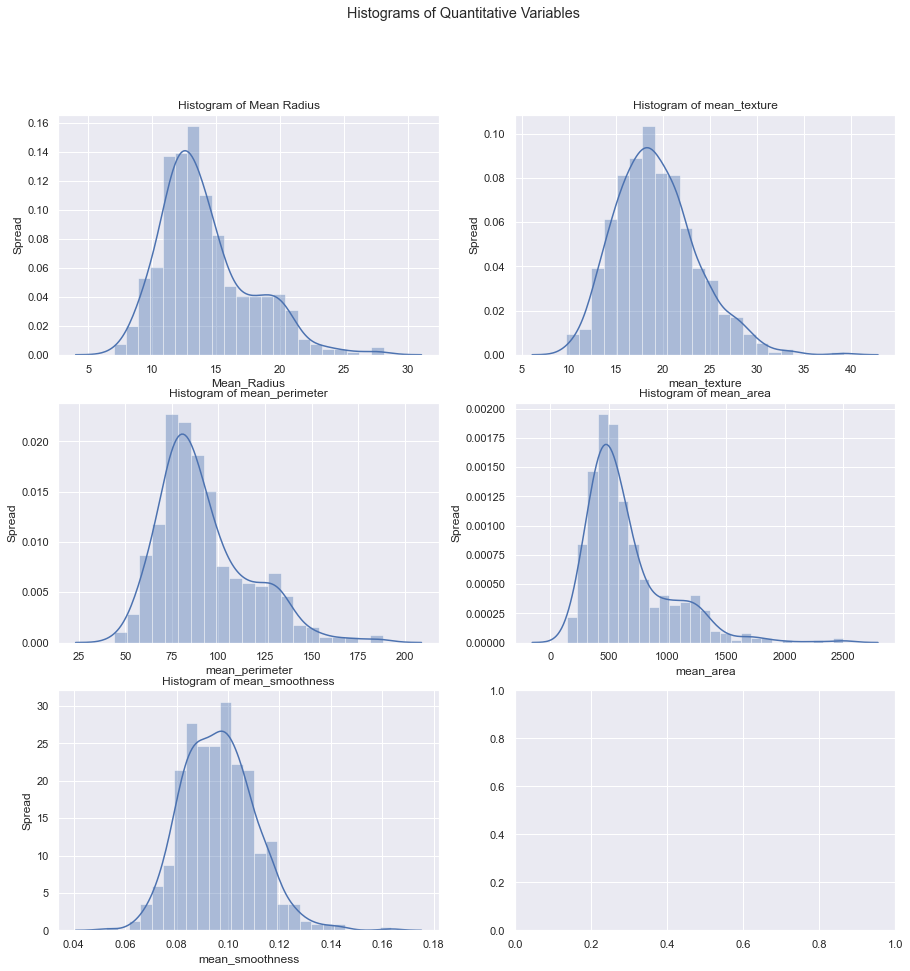

In [8]:
sns.set_theme()
fig, axes = plt.subplots(3,2,figsize=(15,15))
fig.suptitle('Histograms of Quantitative Variables')

sns.distplot(data['mean_radius'], kde=True, ax=axes[0,0])
axes[0,0].set_xlabel('Mean_Radius')
axes[0,0].set_ylabel('Spread')
axes[0,0].set_title('Histogram of Mean Radius')

sns.distplot(data['mean_texture'], kde=True, ax=axes[0,1])
axes[0,1].set_xlabel('mean_texture')
axes[0,1].set_ylabel('Spread')
axes[0,1].set_title('Histogram of mean_texture')

sns.distplot(data['mean_perimeter'], kde=True, ax=axes[1,0])
axes[1,0].set_xlabel('mean_perimeter')
axes[1,0].set_ylabel('Spread')
axes[1,0].set_title('Histogram of mean_perimeter')

sns.distplot(data['mean_area'], kde=True, ax=axes[1,1])
axes[1,1].set_xlabel('mean_area')
axes[1,1].set_ylabel('Spread')
axes[1,1].set_title('Histogram of mean_area')

sns.distplot(data['mean_smoothness'], kde=True, ax=axes[2,0])
axes[2,0].set_xlabel('mean_smoothness')
axes[2,0].set_ylabel('Spread')
axes[2,0].set_title('Histogram of mean_smoothness')



In [9]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [10]:
list1 = data.columns

In [11]:
list1

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

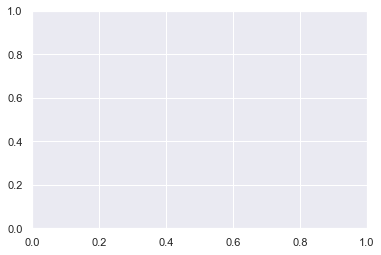

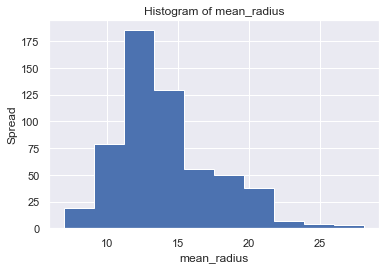

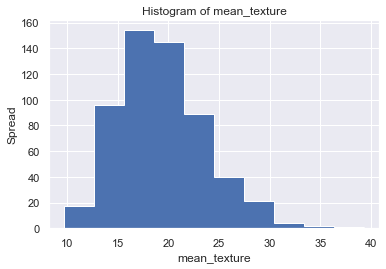

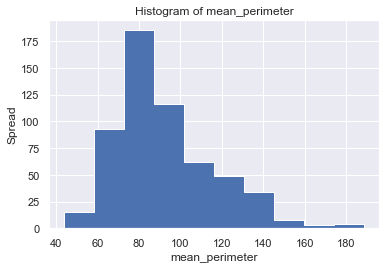

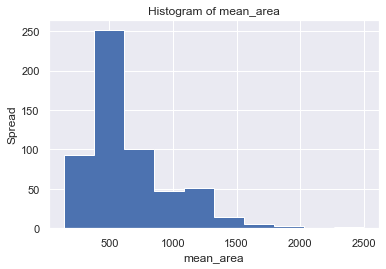

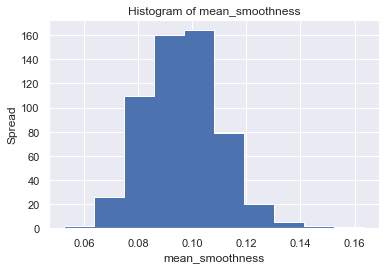

In [12]:
for i,j in enumerate(list1):
    if (j=='diagnosis'):
        break
    plt.grid(True)
    plt.figure(figsize=(13,13))
    plt.subplot(3,2,i+1)
    plt.hist(data[j], histtype='stepfilled')
    plt.xlabel(j)
    plt.ylabel('Spread')
    plt.title(f'Histogram of {j}')

In [13]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

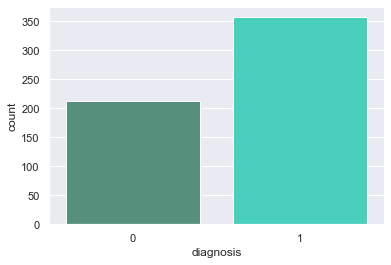

In [14]:
sns.countplot(data['diagnosis'], palette=[(0.3,0.6,0.5),(0.2,0.9,0.8)])

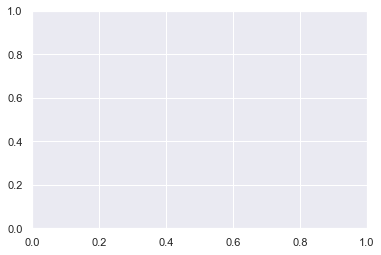

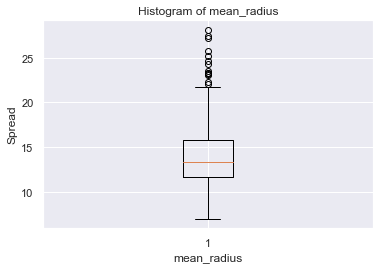

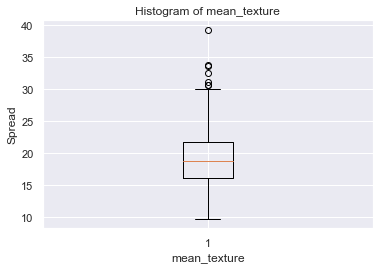

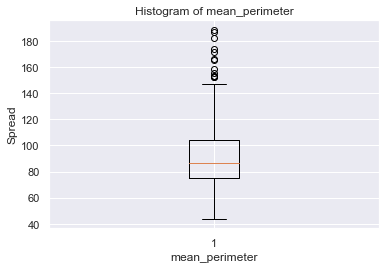

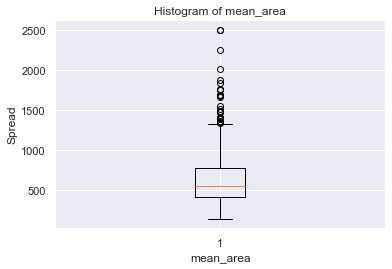

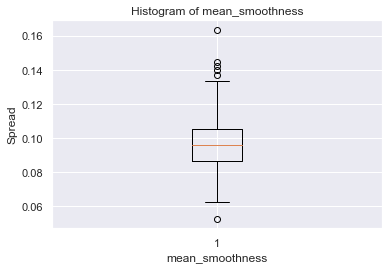

In [15]:
for i,j in enumerate(list1):
    if (j=='diagnosis'):
        break
    plt.grid(True)
    plt.figure(figsize=(13,13))
    plt.subplot(3,2,i+1)
    plt.boxplot(data[j])
    plt.xlabel(j)
    plt.ylabel('Spread')
    plt.title(f'Histogram of {j}')
#Outliers are vissible

In [16]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


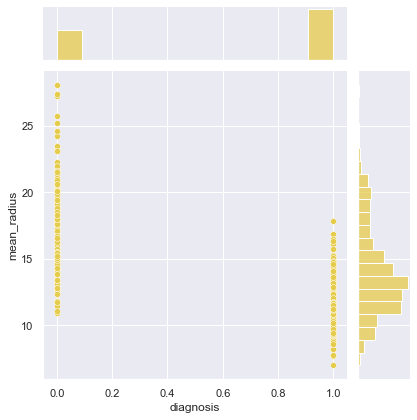

In [17]:
sns.jointplot(data=data, x='diagnosis', y='mean_radius',color=(0.9,0.8,0.3))

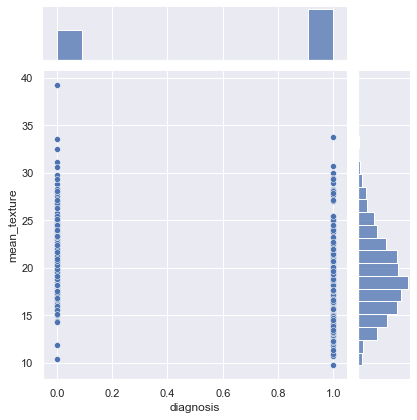

In [18]:
sns.jointplot(data=data, x='diagnosis',y='mean_texture')

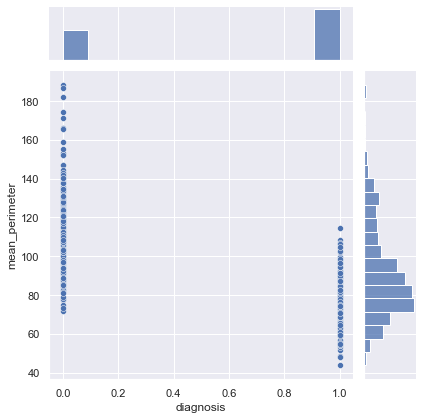

In [19]:
sns.jointplot(data=data, x='diagnosis',y='mean_perimeter')

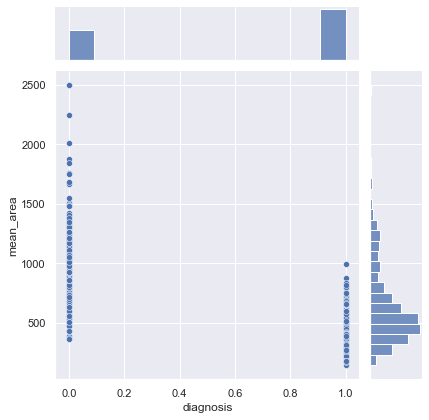

In [20]:
sns.jointplot(data=data, x='diagnosis',y='mean_area')

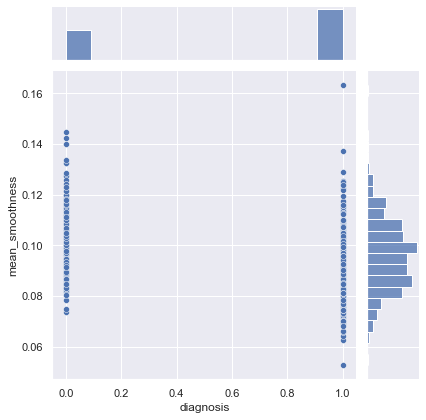

In [21]:
sns.jointplot(data=data, x='diagnosis',y='mean_smoothness')

In [22]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


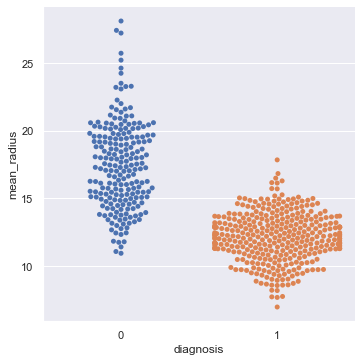

In [23]:
sns.catplot(data=data, x='diagnosis',y='mean_radius', kind='swarm')

In [24]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


<AxesSubplot:xlabel='diagnosis', ylabel='mean_radius'>

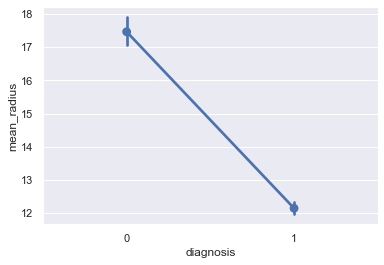

In [25]:
sns.pointplot(data=data, x='diagnosis',y='mean_radius')

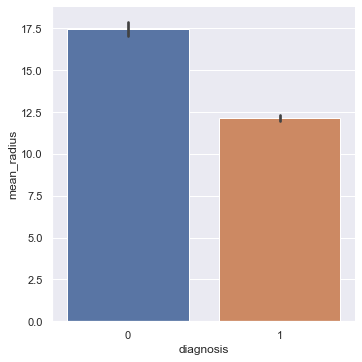

In [26]:
sns.catplot(data=data, x='diagnosis',y='mean_radius', kind='bar')

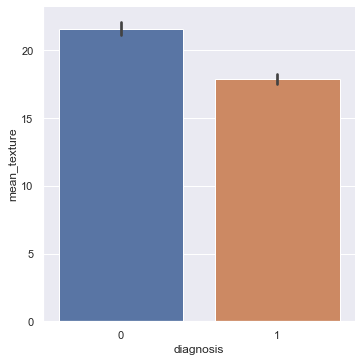

In [27]:
sns.catplot(data=data, x='diagnosis',y='mean_texture', kind='bar')

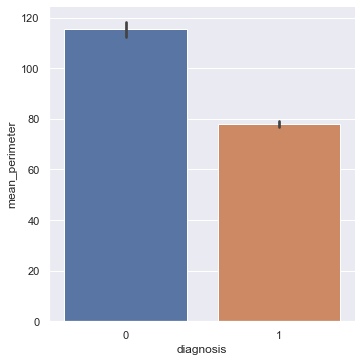

In [28]:
sns.catplot(data=data, x='diagnosis',y='mean_perimeter', kind='bar')

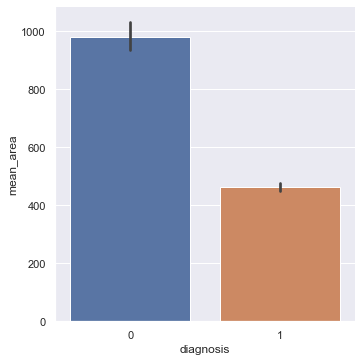

In [29]:
sns.catplot(data=data, x='diagnosis',y='mean_area', kind='bar')

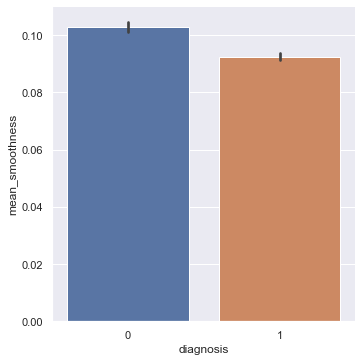

In [30]:
sns.catplot(data=data, x='diagnosis',y='mean_smoothness', kind='bar')

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_perimeter'>

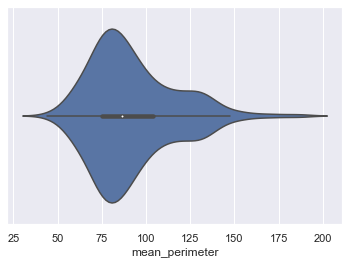

In [31]:
sns.violinplot(data['mean_perimeter'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_texture'>

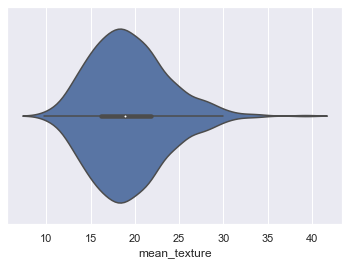

In [32]:
sns.violinplot(data['mean_texture'])

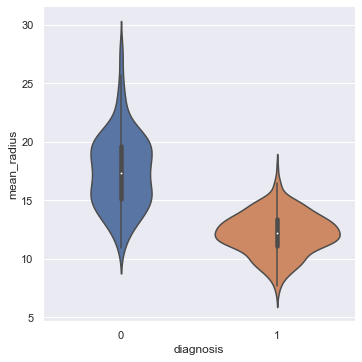

In [33]:
sns.catplot(data=data, x='diagnosis',y='mean_radius', kind='violin')

In [34]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


<AxesSubplot:xlabel='mean_radius', ylabel='mean_texture'>

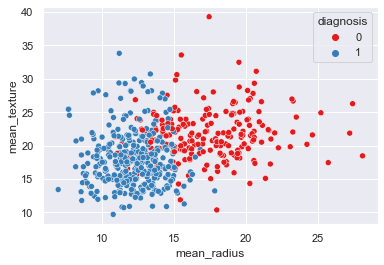

In [35]:
sns.scatterplot(data=data, x='mean_radius',y='mean_texture', hue='diagnosis',palette='Set1')

<AxesSubplot:xlabel='mean_area', ylabel='mean_smoothness'>

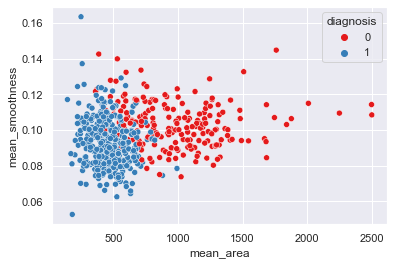

In [36]:
sns.scatterplot(data=data, x='mean_area',y='mean_smoothness',hue = 'diagnosis',palette='Set1')

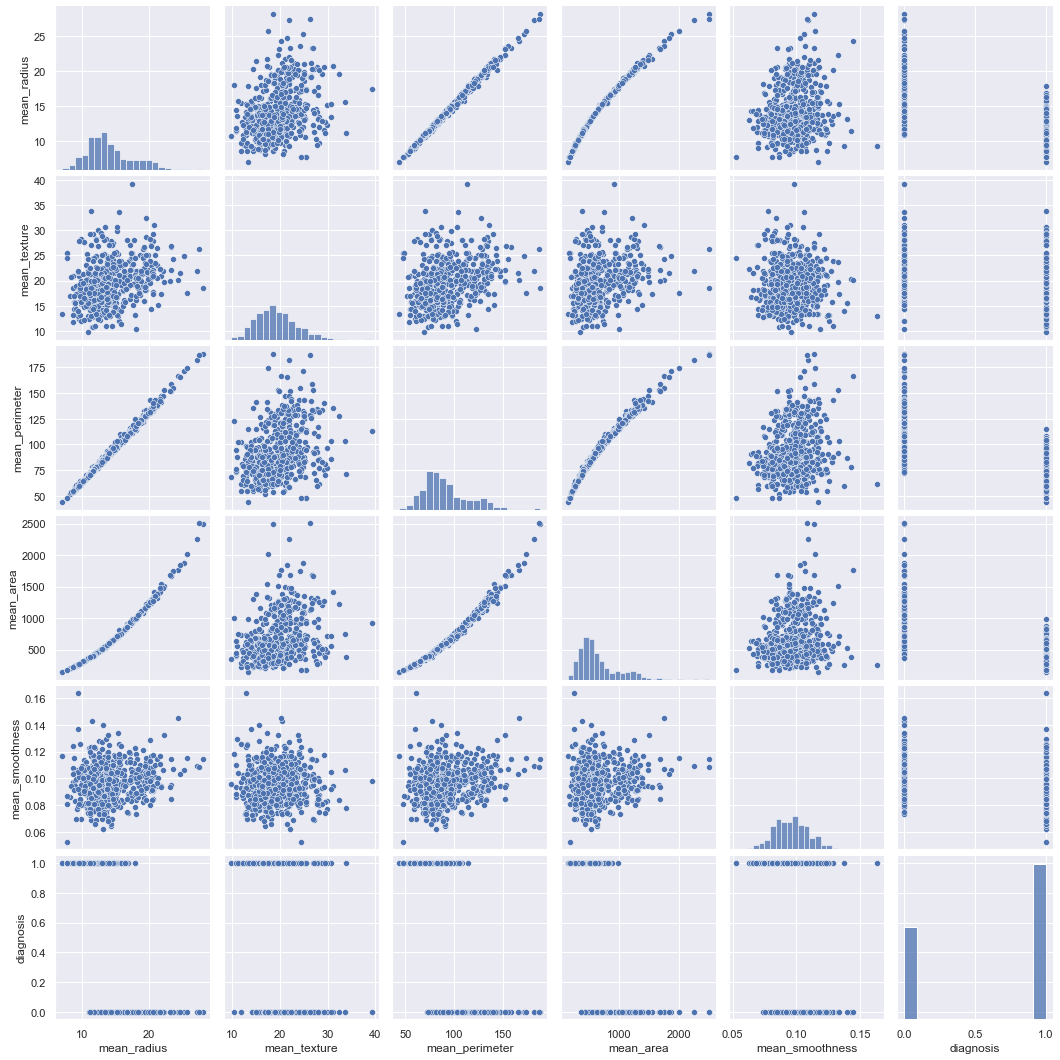

In [37]:
sns.pairplot(data)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [39]:
data1 = data.copy()

In [40]:
data1['diagnosis'] = data1['diagnosis'].apply(str)

In [41]:
data1.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000


For a dichotomous categorical variable and a continuous variable you can calculate a Pearson correlation if the categorical variable has a 0/1-coding for the categories. This correlation is then also known as a point-biserial correlation coefficient.
But when you have more than two categories for the categorical variable the Pearson correlation is not appropriate anymore. You should then use eta-squared, or eta, as an effect-size measure for the relationship of a categorical variable and a continuous variable.

<AxesSubplot:>

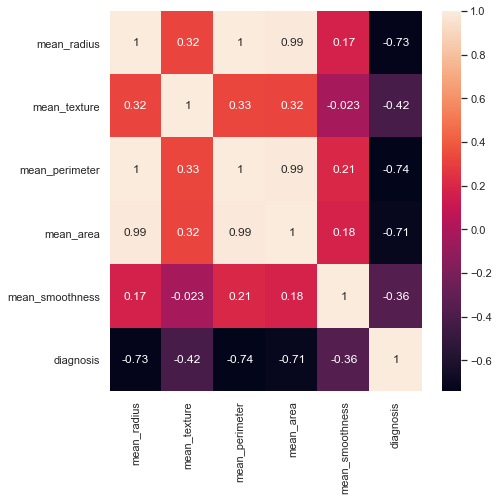

In [42]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), annot=True)


## Machine Learning

In [43]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [45]:
x = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [47]:
model = LogisticRegression()

In [48]:
model.fit(x_train,y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
accuracy_score(y_test, model.predict(x_test))

0.8947368421052632

In [50]:
confusion_matrix(y_test,model.predict(x_test))

array([[41,  6],
       [ 6, 61]], dtype=int64)

In [94]:
def classification(algo,x_tr=x_train,x_te=x_test,y_tr=y_train,y_te=y_test):
    #Model Training
    global model
    model = algo
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    print('Accuracy Score -Training'.center(40,'='))
    print(accuracy_score(y_train,y_pred_train))
    print('Accuracy Score -Testing'.center(40,'='))
    print(accuracy_score(y_test,y_pred))
    
    #Visualizing
    plt.figure(figsize=(8,8))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of Testing Data')
    plt.show()
    
    #classification Report
    print(classification_report(y_test,y_pred))

### Logistic Regression

=======Accuracy Score - Training========
0.9098901098901099
========Accuracy Score - Testing========
0.8947368421052632


C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


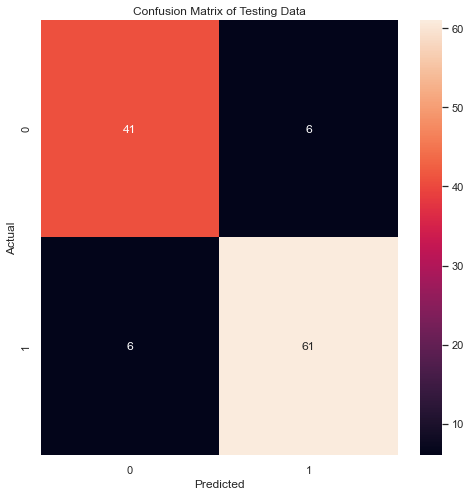

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        47
           1       0.91      0.91      0.91        67

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



In [68]:
classification(LogisticRegression())
#This model is good for predicting
#No overfitting

### KNN

In [54]:
stc = StandardScaler()

In [55]:
x_train_stc = stc.fit_transform(x_train)
x_test_stc = stc.fit_transform(x_test)

In [58]:
K = range(1,40)
mce = []
for i in K:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train_stc,y_train)
    y_pred = model.predict(x_test_stc)
    mce.append((1-accuracy_score(y_test,y_pred)))

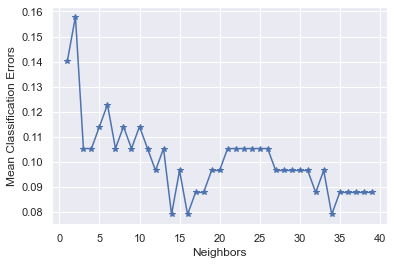

In [59]:
plt.plot(K,mce,'b*-')
plt.xlabel('Neighbors')
plt.ylabel('Mean Classification Errors')
plt.show()

=======Accuracy Score - Training========
0.9142857142857143
========Accuracy Score - Testing========
0.8947368421052632


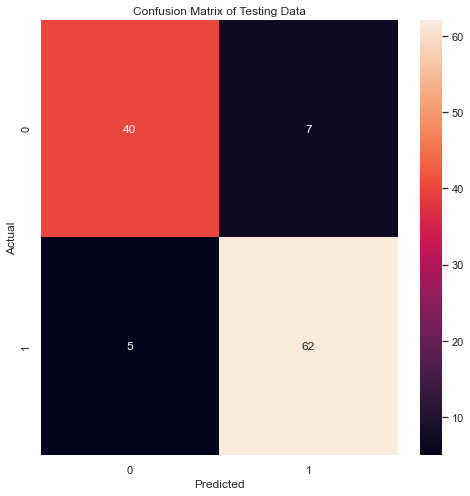

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        47
           1       0.90      0.93      0.91        67

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



In [69]:
classification(KNeighborsClassifier(n_neighbors=4), x_train_stc,x_test_stc,y_train,y_test)
#Model is good 
#Training Accuracy is slightly increased

### LDA

=======Accuracy Score - Training========
0.9296703296703297
========Accuracy Score - Testing========
0.9298245614035088


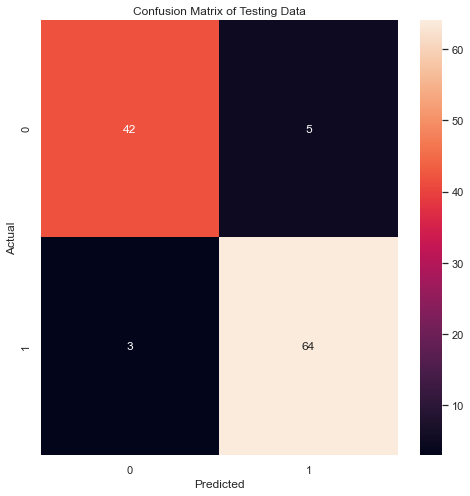

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        47
           1       0.93      0.96      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [70]:
classification(LinearDiscriminantAnalysis())
#Giving best results becuase most of the numeric data show the signs of normal distribution properties
#With more data model will be perfect

### QDA

=============Accuracy Score=============
0.9164835164835164
=============Accuracy Score=============
0.9385964912280702


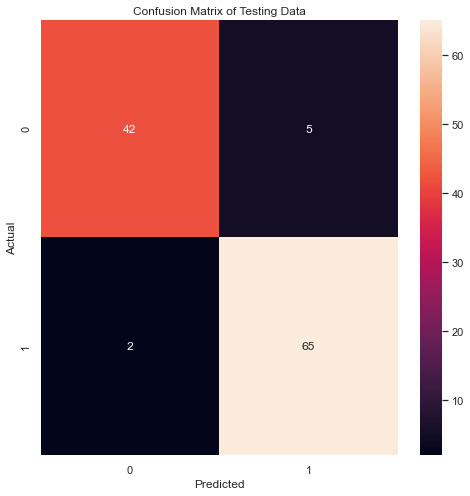

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        47
           1       0.93      0.97      0.95        67

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [64]:
classification(QuadraticDiscriminantAnalysis())
#Since the testing accuracy is hogher than the training, better to look for more generalised one

### Naive Bayes

=======Accuracy Score - Training========
0.8989010989010989
========Accuracy Score - Testing========
0.9298245614035088


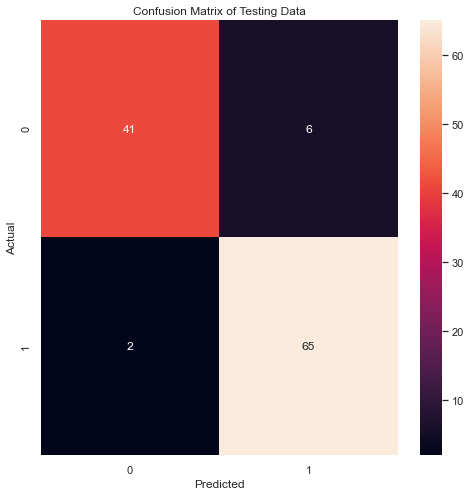

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        47
           1       0.92      0.97      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [71]:
classification(GaussianNB())
#Since the testing accuracy is hogher than the training, better to look for more generalised one

### SVM

=======Accuracy Score - Training========
0.8703296703296703
========Accuracy Score - Testing========
0.8771929824561403


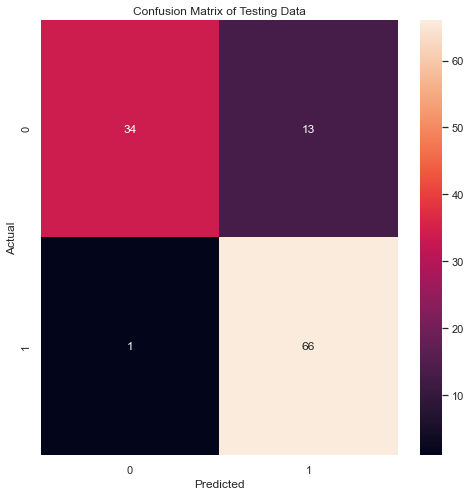

              precision    recall  f1-score   support

           0       0.97      0.72      0.83        47
           1       0.84      0.99      0.90        67

    accuracy                           0.88       114
   macro avg       0.90      0.85      0.87       114
weighted avg       0.89      0.88      0.87       114



In [72]:
classification(SVC(), x_train_stc,x_test_stc,y_train,y_test)

In [79]:
params = {'C':range(1,100)}
model = SVC()
gscv = GridSearchCV(model,params, cv=5, n_jobs=-1)
gscv.fit(x_train_stc,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1, param_grid={'C': range(1, 100)})

In [80]:
gscv.best_params_

{'C': 1}

=======Accuracy Score - Training========
0.8703296703296703
========Accuracy Score - Testing========
0.8771929824561403


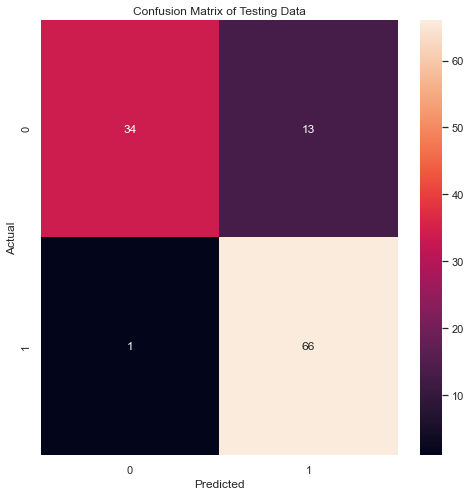

              precision    recall  f1-score   support

           0       0.97      0.72      0.83        47
           1       0.84      0.99      0.90        67

    accuracy                           0.88       114
   macro avg       0.90      0.85      0.87       114
weighted avg       0.89      0.88      0.87       114



In [81]:
classification(SVC(coef0=0.1))
#No big impact by tuning the parameters

### Decision Tree Classifier

=======Accuracy Score - Training========
1.0
========Accuracy Score - Testing========
0.8859649122807017


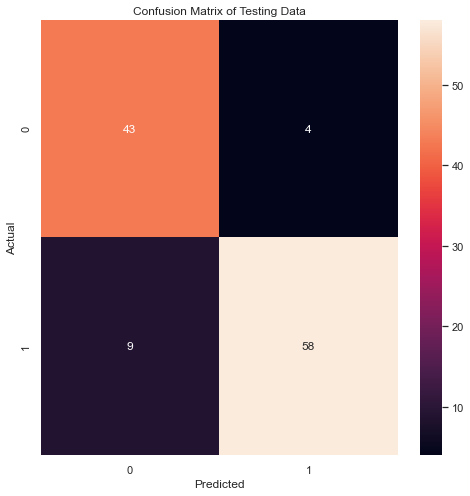

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        47
           1       0.94      0.87      0.90        67

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114



In [82]:
classification(DecisionTreeClassifier())
#Model is overfitted
#Parameter tunning is essential

In [91]:
params = {'min_samples_leaf':range(1,100)}
model = DecisionTreeClassifier(criterion='entropy',max_depth=44,min_samples_leaf=5)
gscv1 = GridSearchCV(model, params, cv=5, n_jobs=-1)
gscv1.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_depth=44),
             n_jobs=-1, param_grid={'min_samples_leaf': range(1, 100)})

In [92]:
gscv1.best_params_

{'min_samples_leaf': 5}

========Accuracy Score -Training========
0.9582417582417583
========Accuracy Score -Testing=========
0.8947368421052632


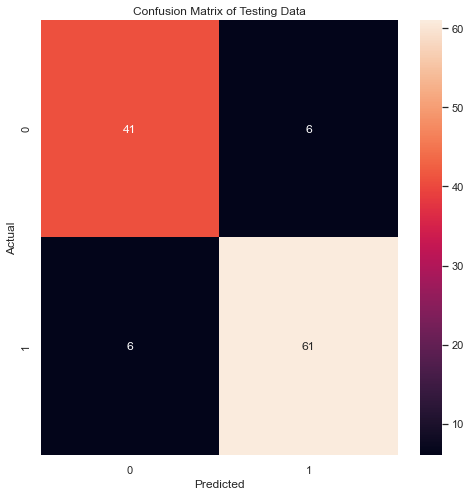

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        47
           1       0.91      0.91      0.91        67

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



In [95]:
classification(DecisionTreeClassifier(criterion='entropy',max_depth=44,min_samples_leaf=5))

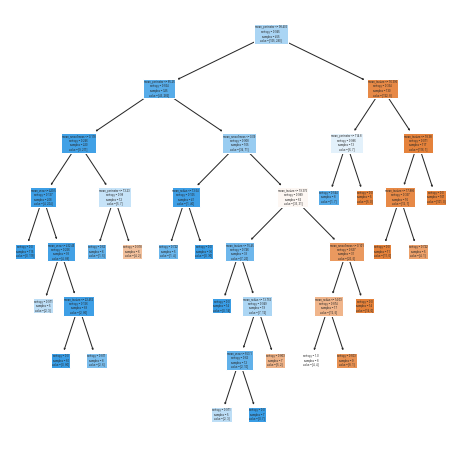

In [101]:
plt.figure(figsize=(8,8))
plot_tree(model, feature_names=x_train.columns, filled=True)
plt.show()

### Bagging Classifier

========Accuracy Score -Training========
0.9934065934065934
========Accuracy Score -Testing=========
0.8859649122807017


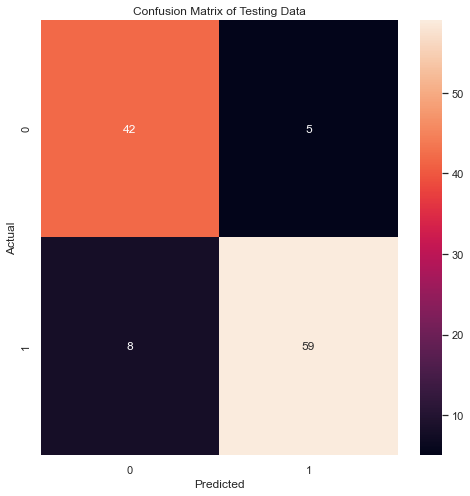

              precision    recall  f1-score   support

           0       0.84      0.89      0.87        47
           1       0.92      0.88      0.90        67

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114



In [102]:
classification(BaggingClassifier())
#Highly Overfitted

### Random Forrest Classifier

========Accuracy Score -Training========
1.0
========Accuracy Score -Testing=========
0.9298245614035088


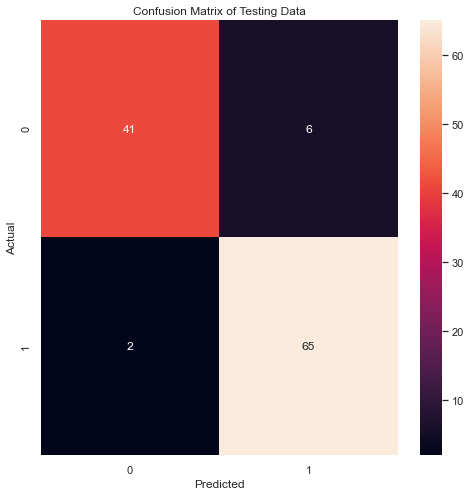

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        47
           1       0.92      0.97      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [103]:
classification(RandomForestClassifier())
#Highly overfitted
#Model can be tuned

In [115]:
params = {'min_samples_leaf':range(1,100)}
model = RandomForestClassifier(n_estimators=23, criterion='entropy',max_depth=62,min_samples_split=6, min_samples_leaf=2)
gscv2 = GridSearchCV(model, params, cv=5, n_jobs=-1)
gscv2.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=62,
                                              min_samples_leaf=2,
                                              min_samples_split=6,
                                              n_estimators=23),
             n_jobs=-1, param_grid={'min_samples_leaf': range(1, 100)})

In [116]:
gscv2.best_params_

{'min_samples_leaf': 1}

========Accuracy Score -Training========
0.9824175824175824
========Accuracy Score -Testing=========
0.9298245614035088


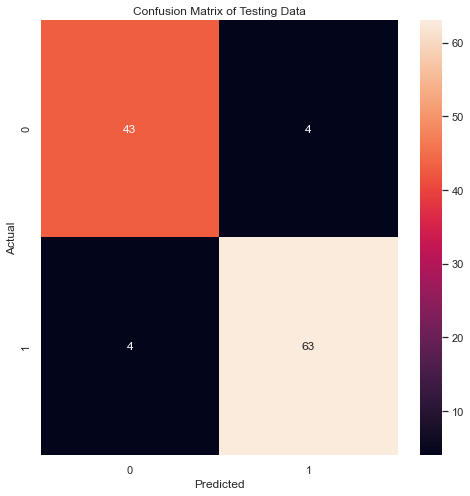

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.94      0.94      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [117]:
classification(RandomForestClassifier(n_estimators=23, criterion='entropy',max_depth=62,min_samples_split=6, min_samples_leaf=2))
#Random Forrest model is overfitrted

### Extre Trees Classifier

========Accuracy Score -Training========
1.0
========Accuracy Score -Testing=========
0.9385964912280702


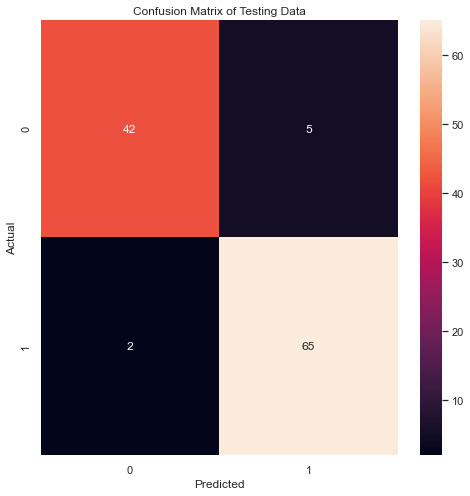

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        47
           1       0.93      0.97      0.95        67

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [118]:
classification(ExtraTreesClassifier())

In [130]:
params = {'min_samples_leaf':range(1,100)}
model = ExtraTreesClassifier(n_estimators=24,max_depth=33, min_samples_split=12)
gscv3 = GridSearchCV(model, params, cv=5, n_jobs=-1)
gscv3.fit(x_train,y_train)


GridSearchCV(cv=5,
             estimator=ExtraTreesClassifier(max_depth=33, min_samples_split=12,
                                            n_estimators=24),
             n_jobs=-1, param_grid={'min_samples_leaf': range(1, 100)})

In [131]:
gscv3.best_params_

{'min_samples_leaf': 1}

========Accuracy Score -Training========
0.9560439560439561
========Accuracy Score -Testing=========
0.9473684210526315


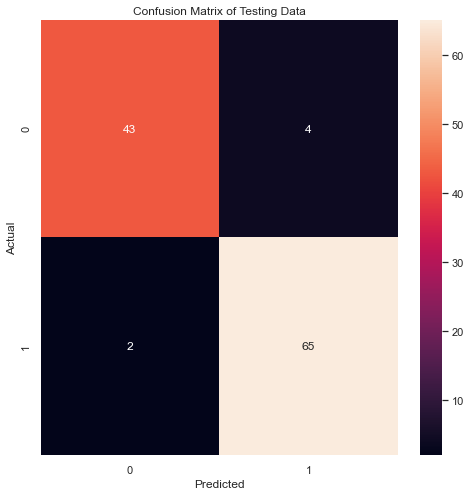

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        47
           1       0.94      0.97      0.96        67

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



In [132]:
classification(ExtraTreesClassifier(n_estimators=24,max_depth=33, min_samples_split=12))
#Model is more generalised now

### AdaBoost Classifer

========Accuracy Score -Training========
0.9824175824175824
========Accuracy Score -Testing=========
0.9122807017543859


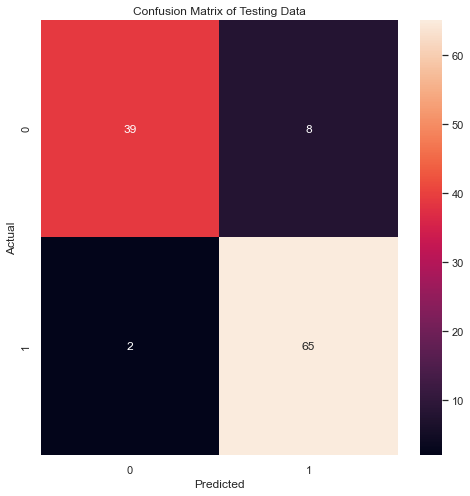

              precision    recall  f1-score   support

           0       0.95      0.83      0.89        47
           1       0.89      0.97      0.93        67

    accuracy                           0.91       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.92      0.91      0.91       114



In [133]:
classification(AdaBoostClassifier())
#Overfitting

### Gradient Boost Classifier

========Accuracy Score -Training========
0.9978021978021978
========Accuracy Score -Testing=========
0.9298245614035088


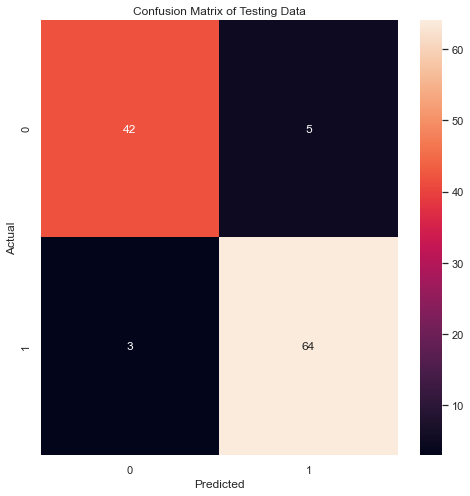

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        47
           1       0.93      0.96      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [134]:
classification(GradientBoostingClassifier())
#Overfitted

### XGB Classifier

C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:12:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
========Accuracy Score -Training========
1.0
========Accuracy Score -Testing=========
0.9298245614035088


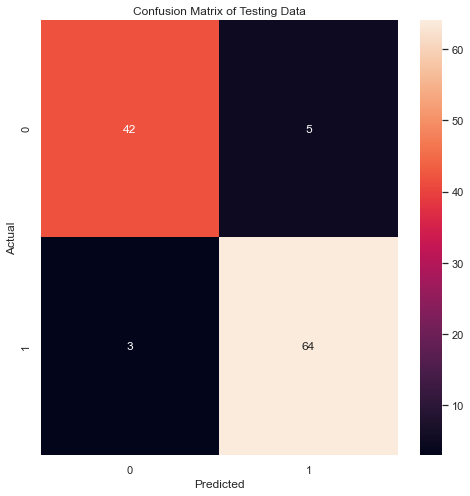

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        47
           1       0.93      0.96      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [135]:
classification(XGBClassifier())

In [138]:
params = {'max_depth':range(1,100)}
model = XGBClassifier(n_estimators=56,max_depth=1)
gscv4 = GridSearchCV(model, params, cv=5, n_jobs=-1)
gscv4.fit(x_train,y_train)

[16:15:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=56, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, 

In [139]:
gscv4.best_params_

{'max_depth': 1}

C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:22:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
========Accuracy Score -Training========
0.9824175824175824
========Accuracy Score -Testing=========
0.9298245614035088


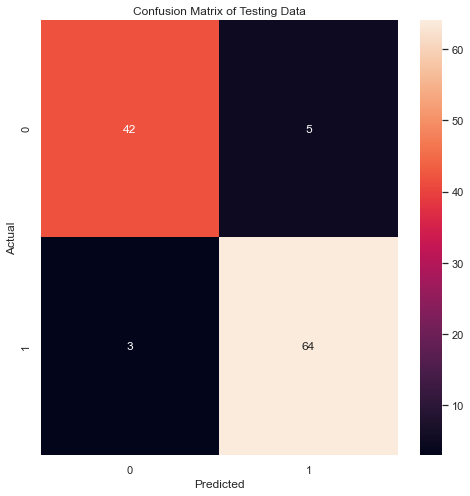

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        47
           1       0.93      0.96      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [145]:
classification(XGBClassifier(n_estimators=56,max_depth=2))
#Highly Overfitted

<Figure size 576x576 with 0 Axes>

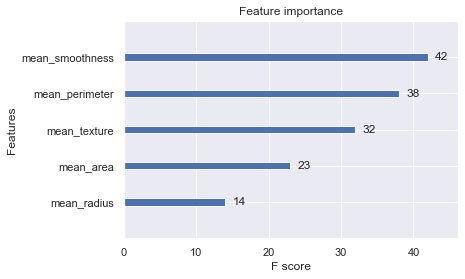

In [146]:
plt.figure(figsize=(8,8))
plot_importance(model)
plt.show()

### Stacking Classifier

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

========Accuracy Score -Training========
0.9582417582417583
========Accuracy Score -Testing=========
0.9210526315789473


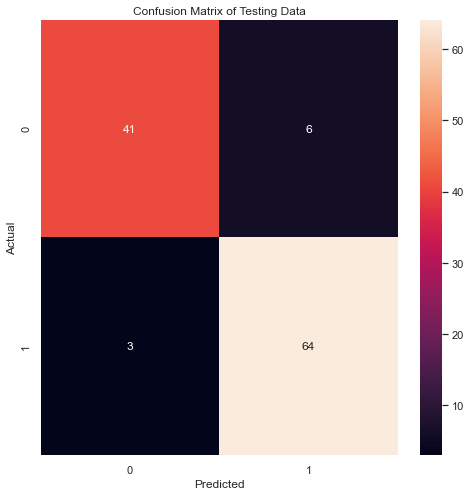

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        47
           1       0.91      0.96      0.93        67

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



In [147]:
T1 = ('lgr', LogisticRegression())
T2 = ('xtc',ExtraTreesClassifier(n_estimators=24,max_depth=33, min_samples_split=12))
metamodel = LinearDiscriminantAnalysis()

classification(StackingClassifier(estimators=[T1,T2], final_estimator=metamodel))
#somewhat generalised model

### Voting Classifier

========Accuracy Score -Training========
0.9406593406593406
========Accuracy Score -Testing=========
0.9210526315789473


C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


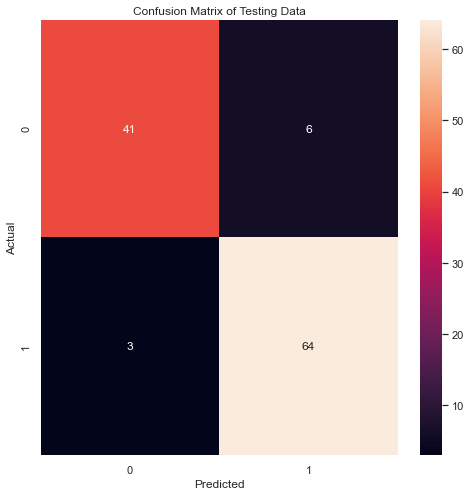

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        47
           1       0.91      0.96      0.93        67

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



In [148]:
T1 = ('lgr', LogisticRegression())
T2 = ('xtc',ExtraTreesClassifier(n_estimators=24,max_depth=33, min_samples_split=12))
T3 = ('lda',LinearDiscriminantAnalysis())

classification(VotingClassifier(estimators=[T1,T2,T3], voting='hard'))


========Accuracy Score -Training========
0.9384615384615385
========Accuracy Score -Testing=========
0.9210526315789473


C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


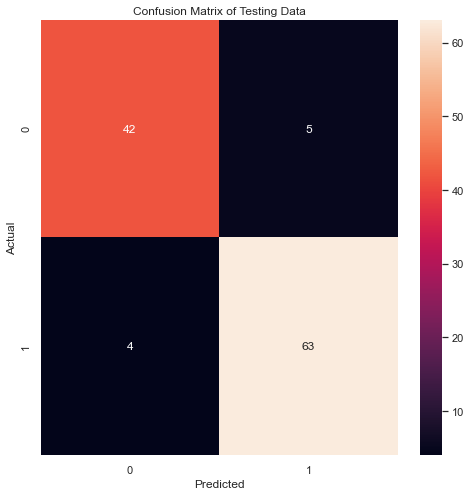

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        47
           1       0.93      0.94      0.93        67

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [149]:
T1 = ('lgr', LogisticRegression())
T2 = ('xtc',ExtraTreesClassifier(n_estimators=24,max_depth=33, min_samples_split=12))
T3 = ('lda',LinearDiscriminantAnalysis())

classification(VotingClassifier(estimators=[T1,T2,T3], voting='soft'))

### Artificial Neural Network

In [153]:
model = Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=x_train_stc.shape[1:]))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [154]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               600       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 10,801
Trainable params: 10,801
Non-trainable params: 0
_________________________________________________________________


In [155]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[ 4.13869768e-02, -1.03123203e-01,  1.03329271e-02,
         -1.69536561e-01,  2.28879049e-01, -2.33125687e-02,
         -1.38459340e-01,  1.27418593e-01, -1.64844841e-01,
         -3.99153531e-02, -1.97915465e-01, -2.06475705e-02,
          1.91949949e-01,  1.81506380e-01,  2.35429302e-01,
         -1.98541403e-01, -1.52569652e-01, -1.52891263e-01,
         -1.50862545e-01, -2.24633977e-01, -5.05890995e-02,
          2.05078170e-01,  1.60653368e-01,  1.02675125e-01,
         -1.10701948e-01,  2.04703882e-01,  7.39036053e-02,
         -1.31921276e-01, -2.25303352e-01, -1.26361609e-01,
         -1.76308811e-01,  4.09143716e-02, -2.10988551e-01,
         -1.52032197e-01,  1.12538502e-01, -1.57544553e-01,
          4.41376120e-02,  1.96639732e-01, -8.04535151e-02,
          3.89185995e-02,  1.54673830e-01,  8.97137821e-03,
         -1.20878324e-01,  8.26361626e-02, -2.27479696e-01,
          1.18146643e-01,  1.849

In [196]:
model.compile(loss='binary_crossentropy', optimizer = optimizers.Adam(), metrics=['acc'])

In [197]:
train_model = model.fit(x_train_stc,y_train, validation_data=(x_test_stc,y_test), epochs=20)

Epoch 1/20
15/15 [==============================] - 0s 8ms/step - loss: 0.0848 - acc: 0.9648 - val_loss: 0.3695 - val_acc: 0.9035
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0756 - acc: 0.9670 - val_loss: 0.3547 - val_acc: 0.8947
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0745 - acc: 0.9670 - val_loss: 0.3805 - val_acc: 0.9035
Epoch 4/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0735 - acc: 0.9670 - val_loss: 0.3674 - val_acc: 0.9035
Epoch 5/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0780 - acc: 0.9692 - val_loss: 0.3663 - val_acc: 0.9035
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0743 - acc: 0.9648 - val_loss: 0.3839 - val_acc: 0.9035
Epoch 7/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0767 - acc: 0.9670 - val_loss: 0.3729 - val_acc: 0.9035
Epoch 8/20
15/15 [==============================] - 0s 2ms/step - loss: 0.0704 - acc: 0.96

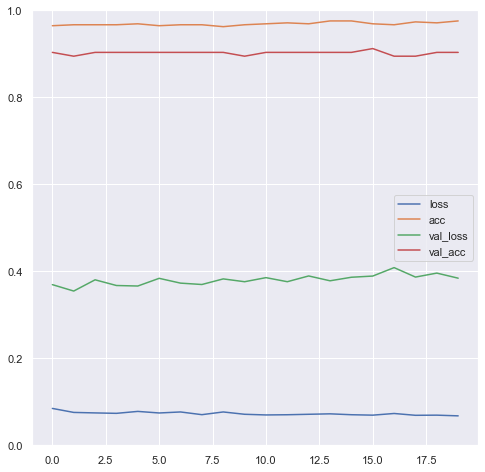

In [198]:
pd.DataFrame(train_model.history).plot(figsize=(8,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [199]:
model.save('BreastCancer.h5')#Without Model tuning

### Saving Extra Trees CLassifier as a pickle file

========Accuracy Score -Training========
0.967032967032967
========Accuracy Score -Testing=========
0.9385964912280702


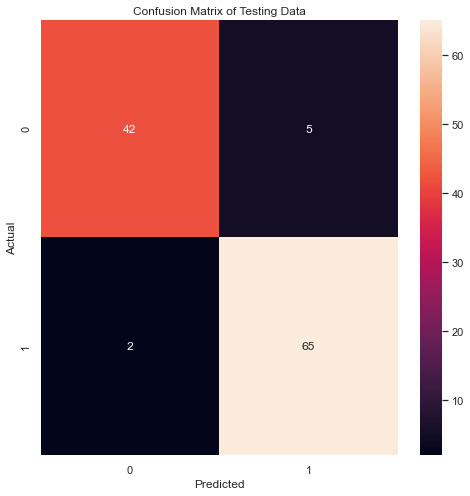

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        47
           1       0.93      0.97      0.95        67

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [201]:
classification(ExtraTreesClassifier(n_estimators=24,max_depth=33, min_samples_split=12))

In [202]:
pickle.dump(model,open('BreastCancer.pkl','wb'))

In [203]:
file = 'C:\Lachin\DataSets\Breast Cancer\BreastCancer.pkl'
pickle.dump(model,open(file,'wb'))